<a href="https://colab.research.google.com/github/AnaSofia29345/Proyecto-IA/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
En este código se va a realizar la carga e inspección de datos de una competencia de kaggle,
la cual esta enfocada en predecir el rendimiento de los estudiantes en las pruebas saberpro de colombia.
En este caso, la competencia tiene tres archivos, train.csv, test.csv y sample_submission.csv.En los cuales,
se muestran las caracteristicas del estudiante, su descripción y como es su rendimiento global en las pruebas.
En este caso, se va a cargar el archivo train.csv y se va a inspeccionar los datos que se encuentran allí.
"""


'\nEn este código se va a realizar la carga e inspección de datos de una competencia de kaggle,\nla cual esta enfocada en predecir el rendimiento de los estudiantes en las pruebas saberpro de colombia.\nEn este caso, la competencia tiene tres archivos, train.csv, test.csv y sample_submission.csv.En los cuales,\nse muestran las caracteristicas del estudiante, su descripción y como es su rendimiento global en las pruebas.\nEn este caso, se va a cargar el archivo train.csv y se va a inspeccionar los datos que se encuentran allí.\n'

In [1]:
from google.colab import files
import json
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anasofia29","key":"1b6ded23a29eeb3f6ccd5fef20a4efd8"}'}

In [2]:
#Se cargan los datos de la competición de Kaggle, subiendo el kaggle.json en la carpeta content
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

  0% 0.00/20.1M [00:00<?, ?B/s]
100% 20.1M/20.1M [00:00<00:00, 253MB/s]


In [3]:
#Se descomprime la carpeta
!unzip udea*.zip > /dev/null

In [4]:
!wc*.csv

/bin/bash: line 1: wc*.csv: command not found


In [8]:
#Se cargan los datos a través de la libreria pandas
import numpy as np
import pandas as pd
#se carga el train.csv
y=pd.read_csv("train.csv")
print("shape of the dataframe",y.shape)


shape of the dataframe (692500, 12)


In [9]:
"""
Se muestran los datos que están en el train.csv de kaggle,
en el cual se puede apreciar la descripción del estudiante, junto con
las etiquetas de clasificación de desempeño de rendimiento global y
el id de cada estudiante
"""
y.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [10]:
#Se realiza la inspección de los datos
"""
En este caso se muestran tres columnas del dataframe,FAMI_ESTRATOVIVIENDA,
ESTU_PRGM_DEPARTAMENTO y RENDIMIENTO_GLOBAL
"""
z=y[["FAMI_ESTRATOVIVIENDA","ESTU_PRGM_DEPARTAMENTO","RENDIMIENTO_GLOBAL"]]
z.head()

,FAMI_ESTRATOVIVIENDA,ESTU_PRGM_DEPARTAMENTO,RENDIMIENTO_GLOBAL
0,Estrato 3,BOGOTÁ,medio-alto
1,Estrato 3,ATLANTICO,bajo
2,Estrato 3,BOGOTÁ,bajo
3,Estrato 4,SANTANDER,alto
4,Estrato 3,ANTIOQUIA,medio-bajo


Text(0, 0.5, 'Cantidad de estudiantes')

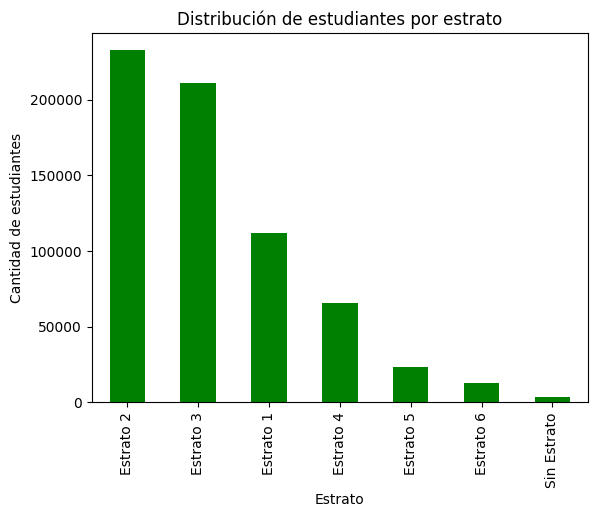

In [11]:
#Se muestra un gráfico de barras con la distribución de la cantidad de estudiantes que pertenecen a cada uno de los estratos.
import matplotlib.pyplot as plt

z.FAMI_ESTRATOVIVIENDA.value_counts().plot(kind="bar", color="GREEN")
plt.title("Distribución de estudiantes por estrato")
plt.xlabel("Estrato")
plt.ylabel("Cantidad de estudiantes")

#En el gráfico se puede ver que la mayoría de estudiantes pertenecen al estrato 2


In [12]:
#Se calcula la desviación estándar de los estratos en los que viven los estudiantes
desviacion=z.groupby("FAMI_ESTRATOVIVIENDA").FAMI_ESTRATOVIVIENDA.count().std()
print(desviacion)
#El valor encontrado indica que tan dispersos están respecto a su promedio

94681.951176658


In [13]:
#Tambíen , se puede calcular la desviación estándar por cada uno de los estratos
#Por ejemplo, se puede calcular para el estrato 1
desviacion=z.groupby("FAMI_ESTRATOVIVIENDA").FAMI_ESTRATOVIVIENDA.count()["Estrato 1"].std()
print(desviacion)
#El valor encontrado indica que tan dispersos están respecto a su promedio en el estrato 1

0.0


'\nEn la gráfica se muestra, el número de estudiantes que hay de programa\npor departamento y se observa que la mayoría pertenecen a bógota, seguido\nde Antioquia\n'

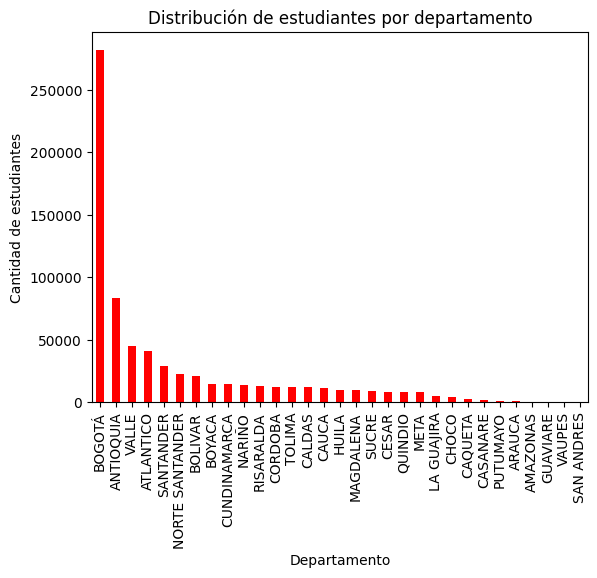

In [14]:
#Se muestran los estudiantes que hay por programa en cada uno de los departamentos
z.ESTU_PRGM_DEPARTAMENTO.value_counts().plot(kind="bar",color="red")
plt.title("Distribución de estudiantes por departamento")
plt.xlabel("Departamento")
plt.ylabel("Cantidad de estudiantes")
"""
En la gráfica se muestra, el número de estudiantes que hay de programa
por departamento y se observa que la mayoría pertenecen a bógota, seguido
de Antioquia
"""

In [15]:
#se muestra en la columna cuantos estudiantes hay por cada uno de los departamentos
t=z.ESTU_PRGM_DEPARTAMENTO.value_counts()
print(t)

ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: count, dtype: int64


In [16]:
#se puede calcular el promedio  de todos los estudiantes de programa por departamento
promedio=z.ESTU_PRGM_DEPARTAMENTO.value_counts().mean()
print(promedio)
#se puede decir que de acuerdo a todos los departamentos, asistieron en promedio 2238.7 estudiantes

22338.709677419356


In [17]:
#Tambíen se puede calcular cual fue el promedio de los estudiantes que asistieron en Antioquia
promedio=z.ESTU_PRGM_DEPARTAMENTO.value_counts()["ANTIOQUIA"]
print(promedio)
#se puede decir en base a este calculo, que en Antioquia asistieron 83607 estudiantes

83607


In [18]:
"""
Posteriormente, podemos mirar si los datos mencionados anteriormente como el estrato de
vivienda y el programa por departamento, pueden influir en el rendimiento global de
los estudiantes
"""

'\nPosteriormente, podemos mirar si los datos mencionados anteriormente como el estrato de\nvivienda y el programa por departamento, pueden influir en el rendimiento global de\nlos estudiantes\n'

In [19]:
 #se instala rlxutils para crear subplots
!pip install rlxutils

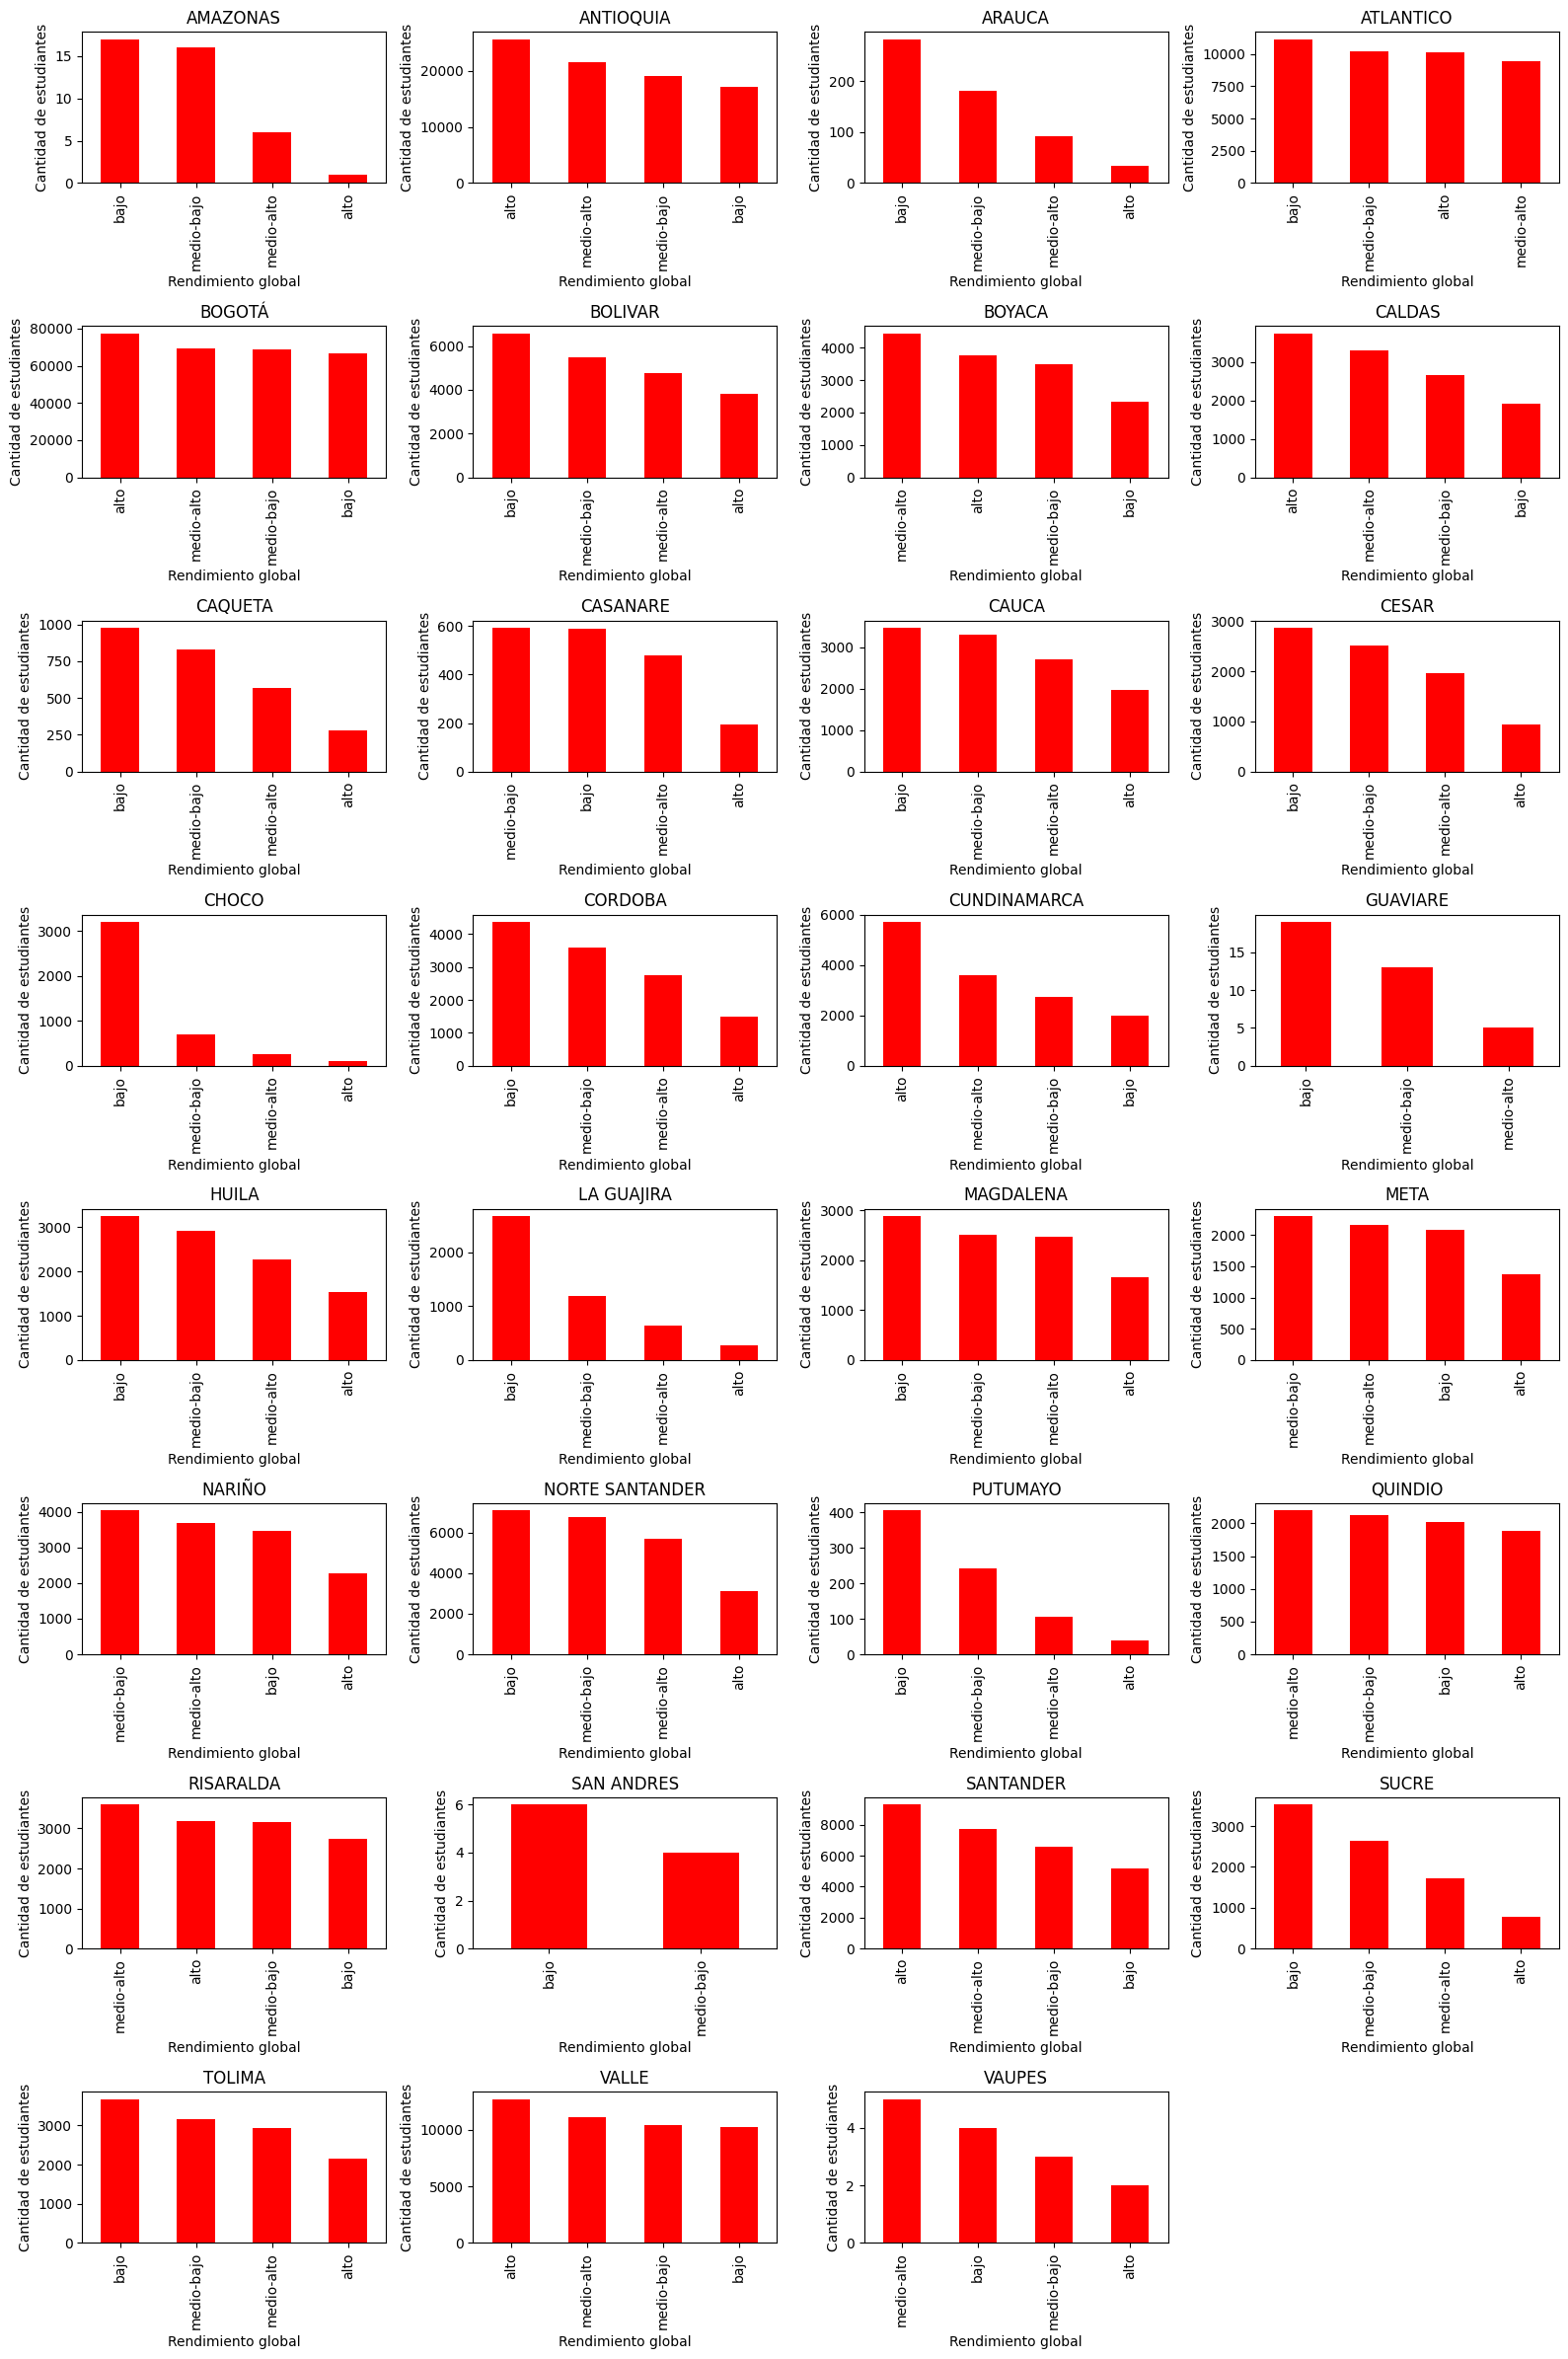

In [20]:
from rlxutils import subplots
import matplotlib.pyplot as plt
"""
se analiza, cual fue el rendimiento global de acuerdo a cada uno de los
departamentos y se podría decir que estos pueden influenciar en el rendimiento.
Por ejemplo, de acuerdo a las gráficas, se observa que al comparar el departamento
de Antioquia con el de Amazonas,em el primero predomina un rendimiento alto
y en el segundo un rendimiento bajo

"""
c = sorted(z.ESTU_PRGM_DEPARTAMENTO.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_PRGM_DEPARTAMENTO==ci]
    counts=zc.RENDIMIENTO_GLOBAL.value_counts()
    filtered_counts=counts[counts.index.isin(['bajo', 'medio-bajo', 'medio-alto', 'alto'])]
    filtered_counts.plot(kind='bar',color="Red")
    plt.title(ci)
    plt.xlabel("Rendimiento global")
    plt.ylabel("Cantidad de estudiantes")



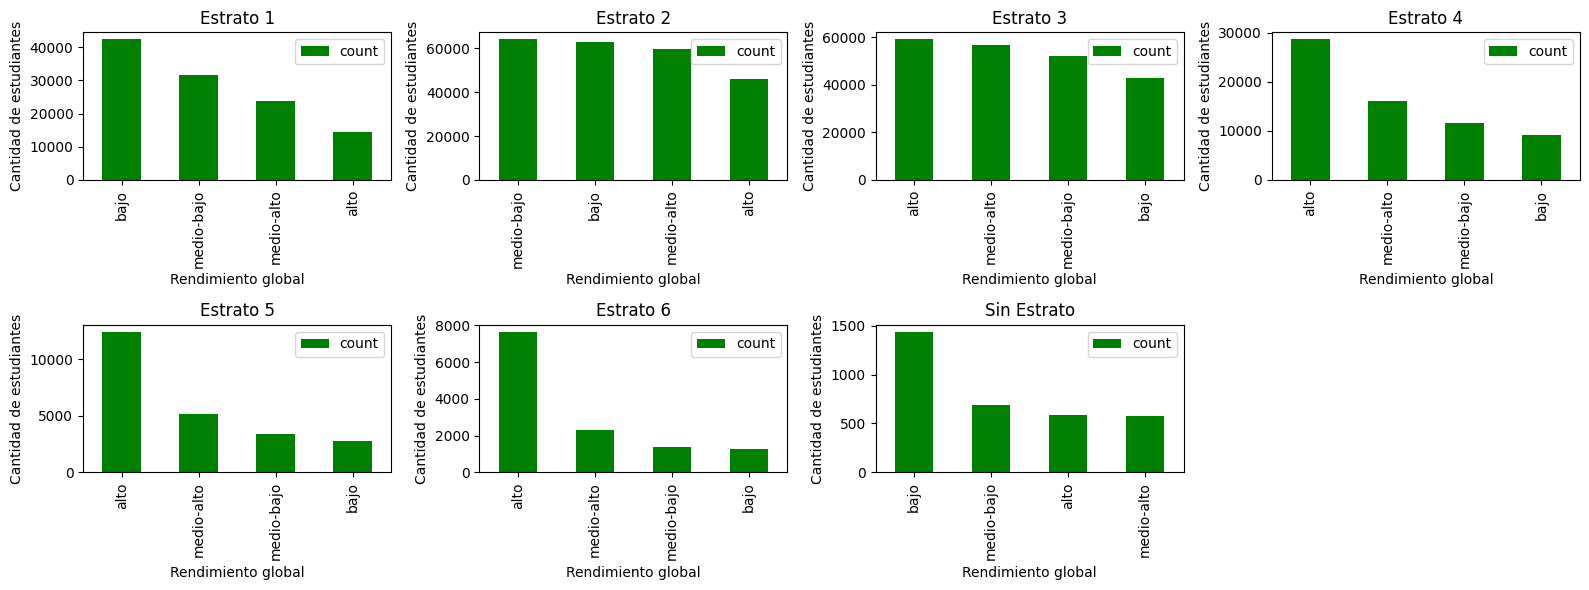

In [21]:
"""
Después, se compara cual fue la tendencia del rendimiento global de acuerdo
a cada uno de los estratos de la vivienda y se podría decir que estos
pueden influenciar en el rendimiento. Por ejemplo, de acuerdo a las gráficas,
se observa que al comparar el estrato 1 con el 3, en el primero predomina
un rendimiento bajo y en el segundo un rendimiento alto
"""
c = sorted(z.FAMI_ESTRATOVIVIENDA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.FAMI_ESTRATOVIVIENDA==ci]
    counts=zc.RENDIMIENTO_GLOBAL.value_counts()
    filtered_counts=counts[counts.index.isin(['bajo', 'medio-bajo', 'medio-alto', 'alto'])]
    filtered_counts.plot(kind='bar',color="GREEN")
    plt.title(ci)
    plt.xlabel("Rendimiento global")
    plt.ylabel("Cantidad de estudiantes")
    plt.legend()

